In [15]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [55]:
# Dataframes

games = pd.read_csv("games.csv")
platforms = pd.read_csv("game_platforms.csv")
stores = pd.read_csv("game_stores.csv")

In [4]:
games.head()

,slug,name,playtime,rating,released
0,satisfactory,Satisfactory,12,4.30,2024-09-11
1,v-rising,V Rising,7,3.70,2024-05-08
2,stalker-2,S.T.A.L.K.E.R. 2: Heart of Chornobyl,10,3.84,2024-11-20
3,senuas-saga-hellblade-ii,Senua's Saga: Hellblade II,0,3.95,2024-05-21
4,hollow-knight-silksong,Hollow Knight: Silksong,0,4.22,2024-12-31


In [5]:
platforms.head()

,slug,platform
0,satisfactory,PC
1,v-rising,PC
2,stalker-2,PC
3,stalker-2,Xbox Series S/X
4,senuas-saga-hellblade-ii,PC


In [6]:
stores.head()

,slug,store
0,satisfactory,Steam
1,satisfactory,Epic Games
2,v-rising,Steam
3,stalker-2,Steam
4,stalker-2,Xbox Store


### Missing Value Check

In [7]:
games.isna().sum().sum()

np.int64(0)

In [8]:
stores.isna().sum().sum()

np.int64(0)

In [9]:
platforms.isna().sum().sum()

np.int64(0)

### Value Counts 

In [13]:
platforms["platform"].value_counts().reset_index()

,platform,count
0,PC,94
1,PlayStation 5,44
2,Xbox Series S/X,36
3,Xbox One,14
4,macOS,13
5,PlayStation 4,13
6,Nintendo Switch,12
7,Linux,9
8,Web,1
9,iOS,1


### Platform Distribution
PC emerges as the dominant platform with the highest number of games, followed by PlayStation 5 and Xbox Series S/X. Other platforms, such as macOS, Nintendo Switch, and Linux, have significantly fewer games.

C:\Users\yx\AppData\Local\Temp\ipykernel_9644\700629744.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




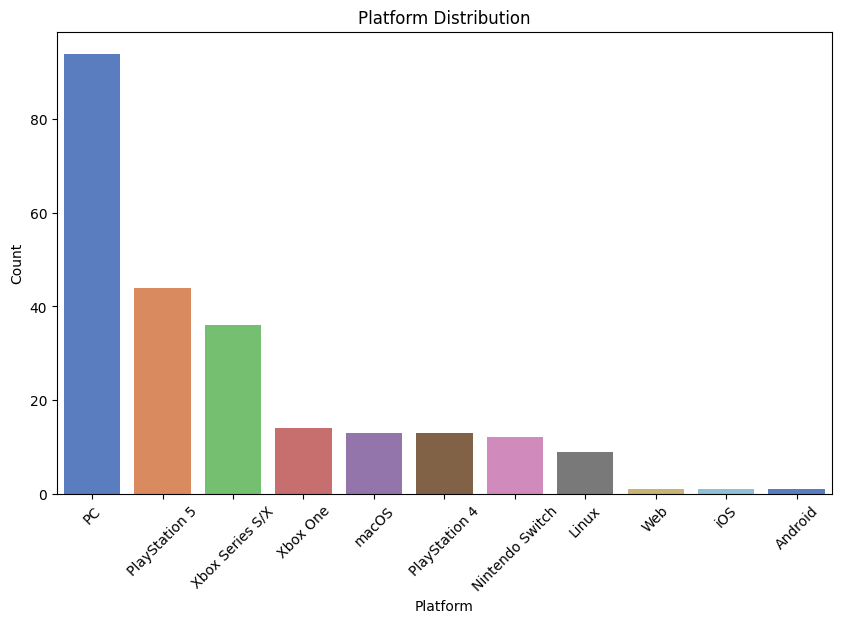

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x="platform", data=platforms,
               order = platforms['platform'].value_counts().index,
               palette = "muted"
        )
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Store Distribution
Here’s a quick look at where the games are available. Steam is clearly leading by a huge margin, hosting the majority of the games. PlayStation Store, GOG, and Epic Games follow behind, but their numbers are much lower. Stores like Nintendo Store, Itch.io, and others seem to have only a handful of games. This shows Steam’s dominance in the gaming market. 

C:\Users\yx\AppData\Local\Temp\ipykernel_9644\823135885.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




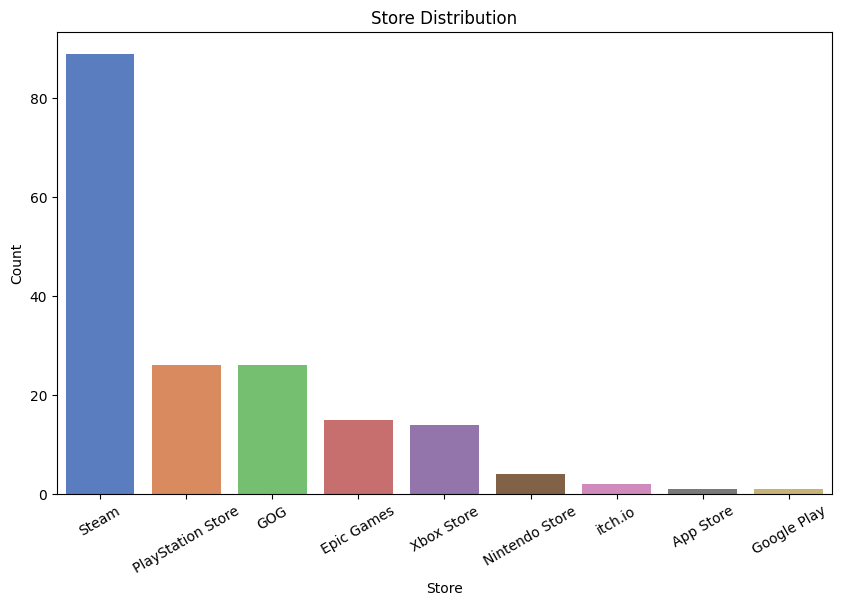

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x="store", data=stores,
               order = stores['store'].value_counts().index,
               palette = "muted"
        )
plt.title('Store Distribution')
plt.xlabel('Store')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [63]:
games["month"] = games["released"].str.split("-").str[1]
month_mapping = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

# Replace month numbers with month names in the 'month' column
games["month"] = games["month"].map(month_mapping)

### Games Count by Month
This chart shows the distribution of game releases across months. February stands out as the busiest month for game releases, while November has the least activity. The data suggests that certain months, like February, October, and May, are popular for game launches, potentially aligning with industry trends or marketing strategies.


C:\Users\yx\AppData\Local\Temp\ipykernel_9644\3481891658.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




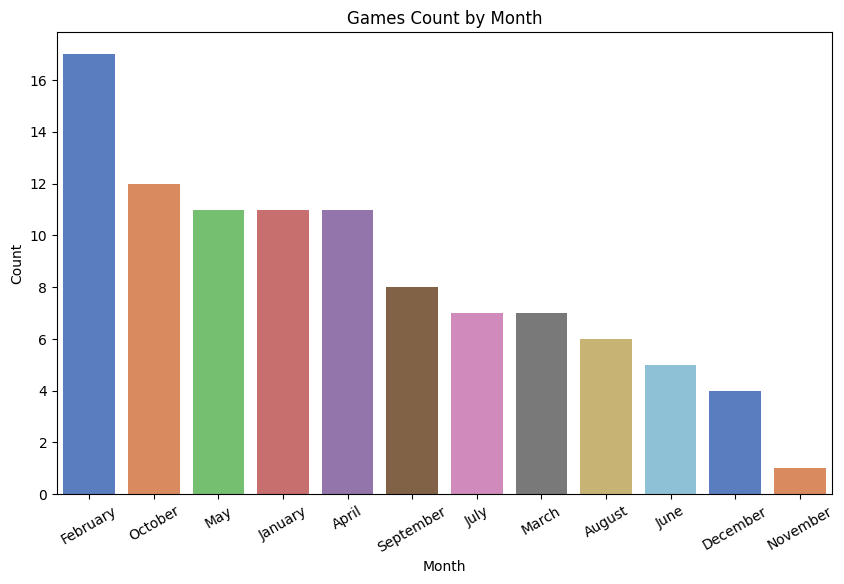

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x="month", data=games,
               order = games['month'].value_counts().index,
               palette = "muted"
        )
plt.title('Games Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


## Merge Dataframes


In [67]:
data = pd.merge(games, platforms, on="slug", how="inner")
data = pd.merge(data, stores, on="slug", how="inner")   
data.head()

,slug,name,playtime,rating,released,month,platform,store
0,satisfactory,Satisfactory,12,4.30,2024-09-11,September,PC,Steam
1,satisfactory,Satisfactory,12,4.30,2024-09-11,September,PC,Epic Games
2,v-rising,V Rising,7,3.70,2024-05-08,May,PC,Steam
3,stalker-2,S.T.A.L.K.E.R. 2: Heart of Chornobyl,10,3.84,2024-11-20,November,PC,Steam
4,stalker-2,S.T.A.L.K.E.R. 2: Heart of Chornobyl,10,3.84,2024-11-20,November,PC,Xbox Store


### Average Ratings By Platforms

In [78]:
platform_rating = data.groupby("platform")["rating"].mean().sort_values(ascending=False).reset_index()

In [84]:
styled_df = platform_rating.style.background_gradient().set_caption("Average Ratings by Platforms")
styled_df

,platform,rating
0,PlayStation 5,3.719140
1,Xbox Series S/X,3.682353
2,PlayStation 4,3.670000
3,Nintendo Switch,3.580323
4,Xbox One,3.525455
5,PC,3.475402
6,macOS,3.419231
7,Web,3.390000
8,Android,3.190000
9,iOS,3.190000


We can say that players like console games more.

### Average Playtime By Playforms

In [92]:
avg_playtime = data.groupby("platform")["playtime"].mean().sort_values(ascending=False).reset_index().head(6)

In [93]:
avg_playtime.style.background_gradient().set_caption("Average Playtime by Platforms")

,platform,playtime
0,PlayStation 4,12.870968
1,Xbox One,9.363636
2,Xbox Series S/X,9.070588
3,PlayStation 5,8.139785
4,PC,6.977011
5,Nintendo Switch,5.741935
